# Лабораторная работа№2. Нелинейные уравнения.

## Задача 1. Нахождение корней полиномов
### Полиномы : $$0.89x^4+3.67x^3-7.92x^2-13=0$$ $$2x^3-0.35x^2+0.47x-1.43=0$$

В scilab для решения данной задачи существует встроенная команда ***roots***

Синтаксис
**[x]=roots(p)**

Параметры

**p** - полином с действительными или комплексными элементами

**x=roots(p)** возвращает комплексный вектор x корней полинома p. Степень полинома p должна быть <=100. 

Пример кода на scilab:
``` scilab
V =[-13 0 -7.92 3.67 0.89];
p=poly(V,'x','c')
x=roots(p)
```

Приведем вариант решения на python

In [1]:
import numpy as np
p = [0.89, 3.67, -7.92, 0 , -13 ]
roots = np.roots(p)
print(roots)

[-5.74851798+0.j          2.02585946+0.j         -0.2004685 +1.10185027j
 -0.2004685 -1.10185027j]


После решения видим что данный полином имеет два действительных корня $$x_1=-5.74851798$$ $$x_2=2.02585946$$, а так же два мнимых корня $$x_3=-0.2004685 +1.10185027j$$ $$x_4=-0.2004685 -1.10185027j$$

Приступим к решению второго полинома

In [2]:
import numpy as np
p = [2, -0.35, 0.47 , -1.43 ]
roots = np.roots(p)
print(roots)

[-0.34395245+0.84278896j -0.34395245-0.84278896j  0.86290491+0.j        ]


После решения видим что данный полином имеет один действительный корень $$x_1=0.86290491$$ , а так же два мнимых корня $$x_2= -0.34395245+0.84278896j$$ $$x_3=-0.34395245-0.84278896j$$

## Задача 2. Решение нелинейных уранений

### Метод половинного деления
#### Задание: $$2lnx-\frac {1}{x}=0$$
Выисляется по следующему алгоритму
1. Находим точку c = (a + b) / 2;
2. Находим значение f(с);
3. Если f(а) × f(с) < 0, то корень лежит на интервале [a, c], в других случаях он находится на интервале [c, b];
4. Если величина интервала ≤ε, то найден корень с точностью ε, иначе возвращаемся к п.1.

Введите начало интервала
-10
Введите конец интервала
10
Ограничение логарифма x1>0
Функция рассчитывается для промежутка от 0.1 до 10.0


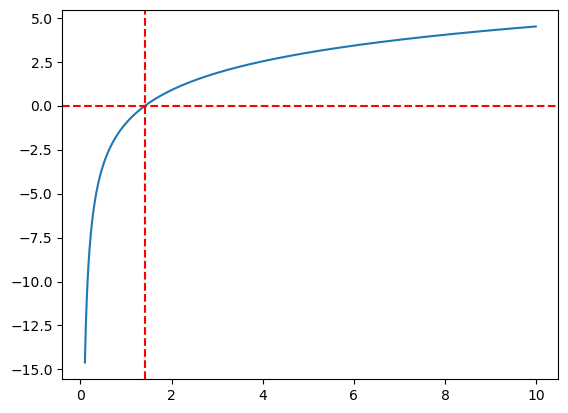

корень 1.4215294241905212
значение функции -9.731378431965254e-07


In [62]:
import math
import numpy as np
import matplotlib.pyplot as plt

# функция уранения f(x)=0
def f(x):
    try:
        return 2*math.log(x)-(1/x)
    except: 
        return x

def rec(x1,x2):
    # переменная поиска корня
    c=(x1+x2)/2

    while(abs(f(c) or e+1)>e):
        # выбор отрезка
        # слева
        if (f(x1)*f(c)<0):
            x2=c
        # справа
        else:
            x1=c
        # следующий шаг полов. деления
        c=(x1+x2)/2
        
    return c
# точность
e=1e-6
#print('Введите погрешность')
#e=float(input())
# пределы поиска решения
print('Введите начало интервала')
x1=float(input())
print('Введите конец интервала')
x2=float(input())
if x1<=0:
    print('Ограничение логарифма x1>0')
    x1 = 0.1
if x2<=0:
    print('Ограничение логарифма x2>0')
    x2 = 0.1

print('Функция рассчитывается для промежутка от',x1,'до',x2)
x = np.arange(x1,x2,0.01)
y = np.vectorize(f)

plt.plot(x,y(x))
res = rec(x1,x2)
plt.axvline(x = res, color = 'r',ls='--')
plt.axhline(y = 0, color = 'r',ls='--')
plt.show()
print('корень',res)
print('значение функции',f(res))

Не смотря на простоту, такое последовательное сужение интервала не всегда рационально, так как требует большого количества вычислений. Кроме того, этот способ не всегда позволяет найти решение с заданной точностью. 

### Метод хорд.

Этот метод отличается от метода половинного деления тем, что очередное
приближение берём не в середине отрезка, а в точке пересечения с осью X прямой, соединяющей точки (a, f(a)) и (b, f(b)) [1, 10].

Алгоритм, реализующий метод хорд, можно представить так:
1. Находим точку c по формуле $$c = a − \frac{f(a)}{f(b)−f(a)}*(b − a)$$
2. Если f(a)·f(c) < 0, то корень лежит на интервале [a, c], иначе - на интервале [c, b];
3. Если абсолютное значение f() не превышает некоторое достаточно малоечисло ϵ, то найден корень с точностью ϵ, иначе возвращаемся к п.1.

Введите начало интервала
-10
Введите конец интервала
10
Ограничение логарифма x1>0
Функция рассчитывается для промежутка от 0.1 до 10.0


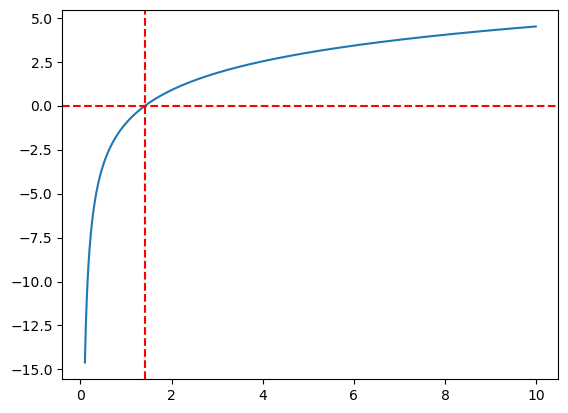

корень 1.4215304357399865
значение функции 9.50628214035909e-07


In [63]:
import math
import numpy as np
import matplotlib.pyplot as plt

# функция уранения f(x)=0
def f(x):
    try:
        return 2*math.log(x)-1/x
    except: 
        return x

def rec(x1,x2):
        
    # переменная поиска корня
    c=x1-(f(x1)/(f(x2)-f(x1)))*(x2-x1)
    while(abs(f(c))>e):
        # выбор отрезка
        # слева
        if ((f(x1)*f(c)<0)):
            x2=c
        # справа
        else:
            x1=c
        # следующий шаг 
        c=x1-(f(x1)/(f(x2)-f(x1)))*(x2-x1)
    return c
# точность
e=1e-6
#print('Введите погрешность')
#e=float(input())
# пределы поиска решения
print('Введите начало интервала')
x1=float(input())
print('Введите конец интервала')
x2=float(input())
if x1<=0:
    print('Ограничение логарифма x1>0')
    x1 = 0.1
if x2<=0:
    print('Ограничение логарифма x2>0')
    x2 = 0.1

print('Функция рассчитывается для промежутка от',x1,'до',x2)
x = np.arange(x1,x2,0.01)
y = np.vectorize(f)

plt.plot(x,y(x))
res = rec(x1,x2)
plt.axvline(x = res, color = 'r',ls='--')
plt.axhline(y = 0, color = 'r',ls='--')
plt.show()
print('корень',res)
print('значение функции',f(res))

Получили корень с большей точностью.

Описанный способ позволяет достаточно быстро (за меньшее количество шагов, чем в методе дихотомии) вычислить значение корня уравнения с заданной точностью.

### Метод касательных

Метод касательных имеет второе название – метод Ньютона.
Единственные требования, накладываемые на функцию f — что у неё есть хотя бы один корень и что она непрерывна и дифференцируема на интервале поиска.

В одной източек интервала [a; b], пусть это будет точка c, проведём касательную 
Запишем уравнение этой прямой:
$$ y = k · x + m $$
Так как эта прямая является касательной, и она проходит через точку $$(c, f(c))$$,то $$k = f′(c)$$.

Следовательно,
$$ y = f′(x) · x + m, f(c) = f′(c) · c + m, m = f(c) − c · f′(c),$$
$$ y = f′(c) · x + f(c) − c · f′(c), y = f′(c) · (x − c) + f(c).$$
Найдём точку пересечения касательной с осью X:$$ f ′(c) · (x − c) + f(c) = 0$$,
$$x = c − \frac{f(c)}{f′(c)}$$
Если |f(x)| < ε, то точность достигнута, и точка x — решение; иначе необходимо переменной c присвоить значение x и провести касательную через новую точку c; так продолжать до тех пор, пока |f(x)| не станет меньше ε . Осталось решить вопрос, что выбрать в качестве точки начального приближения c. 
В этой точке должны совпадать знаки функции и её второй производной.


Введите начало интервала
-10
Введите конец интервала
10
Ограничение логарифма x1>0
Функция рассчитывается для промежутка от 0.1 до 10.0


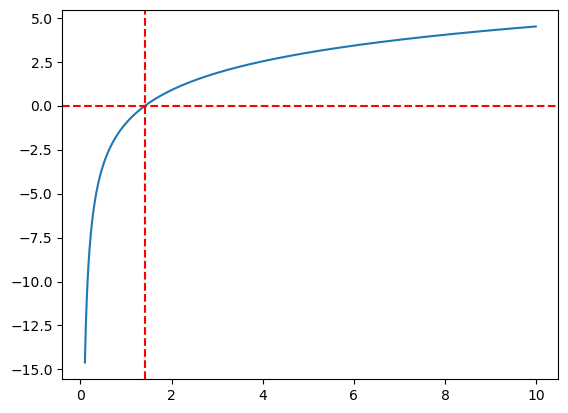

корень 1.4215299352307211
значение функции -1.2407266325453747e-09


In [64]:
import math
import numpy as np
import matplotlib.pyplot as plt

# функция уранения f(x)=0
def f(x):
    try:
        return 2*math.log(x)-1/x
    except: 
        return x
# производная функции
def df(x):
    try:
        return 2/x+1/(x*x)
    except: 
        return x
    
def rec(x1,x2):
    if df(x1)*f(x1)<0:
        c=x1
    else:
        c=x2
    while(abs(f(c))>e):
        c=c-(f(c)/df(c))
    return c

# точность
e=1e-6
#print('Введите погрешность')
#e=float(input())
# пределы поиска решения
print('Введите начало интервала')
x1=float(input())
print('Введите конец интервала')
x2=float(input())
if x1<=0:
    print('Ограничение логарифма x1>0')
    x1 = 0.1
if x2<=0:
    print('Ограничение логарифма x2>0')
    x2 = 0.1

print('Функция рассчитывается для промежутка от',x1,'до',x2)
x = np.arange(x1,x2,0.01)
y = np.vectorize(f)

plt.plot(x,y(x))
res = rec(x1,x2)
plt.axvline(x = res, color = 'r',ls='--')
plt.axhline(y = 0, color = 'r',ls='--')
plt.show()
print('корень',res)
print('значение функции',f(res))

### Метод простой итерации
В практических вычислениях довольно часто приходится решать уравнения вида:
$$f (x) = 0,$$ где функция f(x) определена и непрерывна на некотором конечном или бесконечном, интервале а < х < b.

Если функция представляет собой многочлен, то уравнение называют
алгебраическим, если же в функцию f(x) входят элементарные (тригонометрические,
логарифмические, показательные и т. п.) функции, то такое уравнение называют
трансцендентным.

Всякое значение x*, обращающее функцию f (х) в нуль, т. е. такое, что
$$f(х*) = 0,$$ называется корнем уравнения, а способ нахождения этого значения х* и есть решение уравнения.

Приведем исходное уравнение к виду итерационного уравнения. Для этого
уравнение представим в форме:
$$x = \varphi (x)$$
что всегда можно сделать и притом многими способами. Например, можно
выделить из уравнения х, остальное перенести в правую часть (это и будет
$\varphi(х)$). Или умножить левую и правую части исходного уравнения на произвольную константу $\lambda$ и прибавить к левой и правой частям Х, т. е. представить уравнение в виде
$$x=x+\lambda f(x).$$
При этом $\varphi(х)=x+\lambda f(x)$.
Выберем на отрезке [$\alpha, \beta$] произвольную точку $X_0$ — нулевое приближение, и примем в качестве следующего приближения
$$х1=\varphi(х_0),$$
далее
$$х2=\varphi(х_1),$$
и вообще пусть $Х_п$ получается из $Х_{n-1}$ по формуле
$$Xn = \varphi(X_{n-1})$$
Этот процесс последовательного вычисления чисел $Х_п$ (п = 1, 2, 3,...) по предыдущей формуле называется методом итераций.


Введите начало интервала
-10
Введите конец интервала
10
Ограничение логарифма x1>0
Функция рассчитывается для промежутка от 0.1 до 10.0
Количество итераций 137


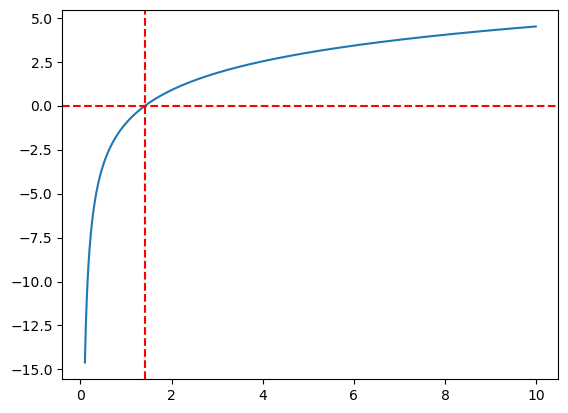

корень 1.4215293898901364
значение функции -1.0383703886729378e-06


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# функция уранения f(x)=0
def f(x):
    try:
        return 2*math.log(x)-1/x
    except: 
        return x

def rec(x1,x2):
    x=x1
    l=0.05
    k=0
    x1=x-l*f(x)
    while (abs(f(x1))>e):
        k+=1
        x=x1
        x1=x-l*f(x)
    print('Количество итераций',k)
    return x
# точность
e=1e-6
#print('Введите погрешность')
#e=float(input())
# пределы поиска решения
print('Введите начало интервала')
x1=float(input())
print('Введите конец интервала')
x2=float(input())

if x1<=0:
    print('Ограничение логарифма x1>0')
    x1 = 0.1
if x2<=0:
    print('Ограничение логарифма x2>0')
    x2 = 0.1


print('Функция рассчитывается для промежутка от',x1,'до',x2)
x = np.arange(x1,x2,0.01)
y = np.vectorize(f)

plt.plot(x,y(x))
res = rec(x1,x2)
plt.axvline(x = res, color = 'r',ls='--')
plt.axhline(y = 0, color = 'r',ls='--')
plt.show()
print('корень',res)
print('значение функции',f(res))

### Метод секущих
Метод секущих берёт начало от метода касательных Ньютона, то есть вычисляется по той же формуле: $$x_{k+1} = x_k − \frac{f(x_k)}{f′(x_k)}$$
только производная заменяется на формулу разностей: $$x_{k+1} = x_k − \frac{f(x_k)}{f(x_k)-f(x_{k+1})}*(x_k-x_{k+1})$$
метод секущих производная
тогда формула для вычисления с помощью метода секущих примет вид:
метод секущих формула
при условии|xk+1–xk|<ε, где ε – абсолютная погрешность вычисления корня уравнения.

Введите начало интервала
-5
Введите конец интервала
5
Ограничение логарифма x1>0
Функция рассчитывается для промежутка от 0.56 до 5.0


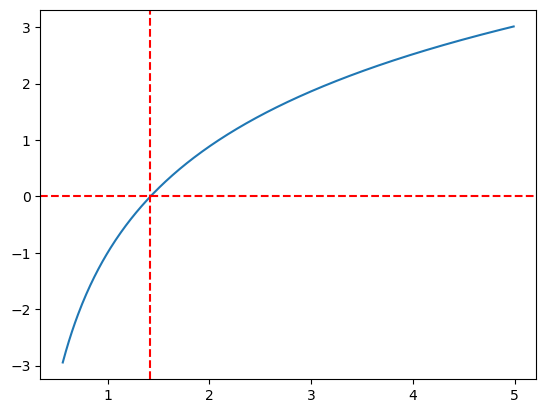

корень 1.4215299358831188
значение функции 4.218847493575595e-15


In [69]:
import math
import numpy as np
import matplotlib.pyplot as plt

# функция уранения f(x)=0
def f(x):
    try:
        return 2*math.log(x)-1/x
    except: 
        return -1
    
def rec(a,b):
    while abs(a-b)>e:
        
        a=b-((b-a)*f(b))/(f(b)-f(a))
        b=a-((a-b)*f(a))/(f(a)-f(b))
    return b

# точность
e=1e-6
#print('Введите погрешность')
#e=float(input())
# пределы поиска решения
print('Введите начало интервала')
x1=float(input())
print('Введите конец интервала')
x2=float(input())
if x1<=0:
    print('Ограничение логарифма x1>0')
    x1 = 0.56
if x2<=0:
    print('Ограничение логарифма x2>0')
    x2 = 0.56

print('Функция рассчитывается для промежутка от',x1,'до',x2)
x = np.arange(x1,x2,0.01)
y = np.vectorize(f)

plt.plot(x,y(x))
res = rec(x1,x2)
plt.axvline(x = res, color = 'r',ls='--')
plt.axhline(y = 0, color = 'r',ls='--')
plt.show()
if res<x1:
    print('корень вне диапазона')
else:
    print('корень',res)
    print('значение функции',f(res))